Import packages and setup

In [121]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)

Load dataset

In [122]:
df = pd.read_excel('https://raw.githubusercontent.com/prat-man/CSE-572-Data-Mining/main/data/Telco_customer_churn.xlsx')

In [123]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [125]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [126]:
info_df = pd.DataFrame(columns=['Feature', 'Unique Count', 'Unique Values'])
for column in df.columns:
    info_df.loc[len(info_df.index)] = [column, df[column].nunique(), df[column].unique()]
info_df

,Feature,Unique Count,Unique Values
0,CustomerID,7043,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK..."
1,Count,1,[1]
2,Country,1,[United States]
3,State,1,[California]
4,City,1129,"[Los Angeles, Beverly Hills, Huntington Park, ..."
5,Zip Code,1652,"[90003, 90005, 90006, 90010, 90015, 90020, 900..."
6,Lat Long,1652,"[33.964131, -118.272783, 34.059281, -118.30742..."
7,Latitude,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3..."
8,Longitude,1651,"[-118.272783, -118.30742, -118.293953, -118.31..."
9,Gender,2,"[Male, Female]"


In [127]:
df.drop(['CustomerID', 'Count', 'City', 'Country', 'State' ,'Zip Code', 'Lat Long', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [128]:
df.isnull().sum()

Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

<Axes: >

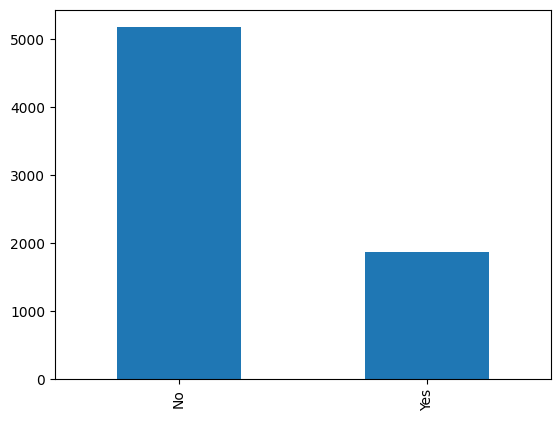

In [129]:
df['Churn Label'].value_counts().plot(kind='bar')

<Axes: >

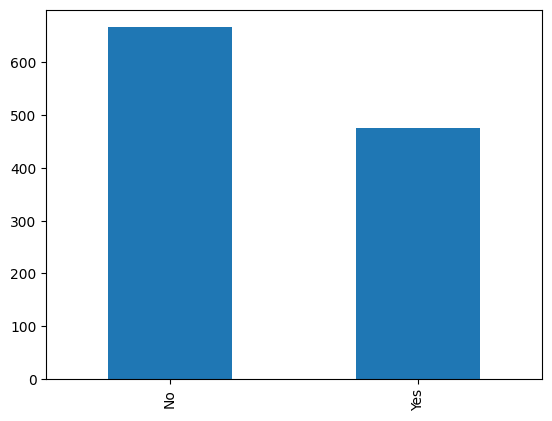

In [130]:
df[df['Senior Citizen'] == 'Yes']['Churn Label'].value_counts().plot(kind='bar')

<Axes: >

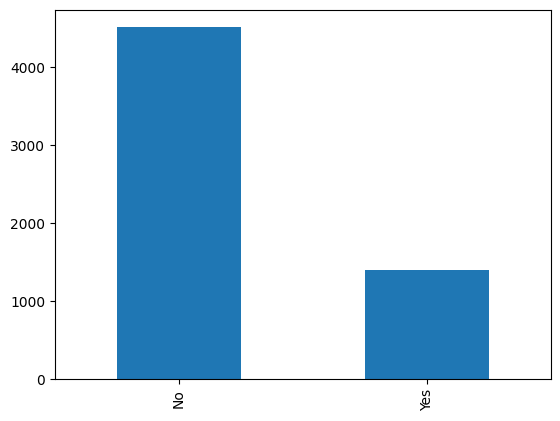

In [131]:
df[df['Senior Citizen'] == 'No']['Churn Label'].value_counts().plot(kind='bar')

<Axes: >

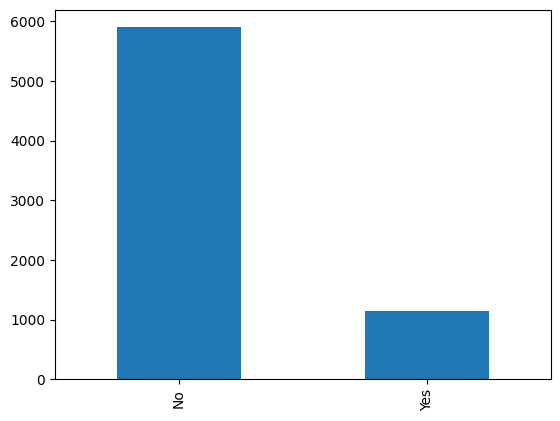

In [132]:
df['Senior Citizen'].value_counts().plot(kind='bar')

<Axes: >

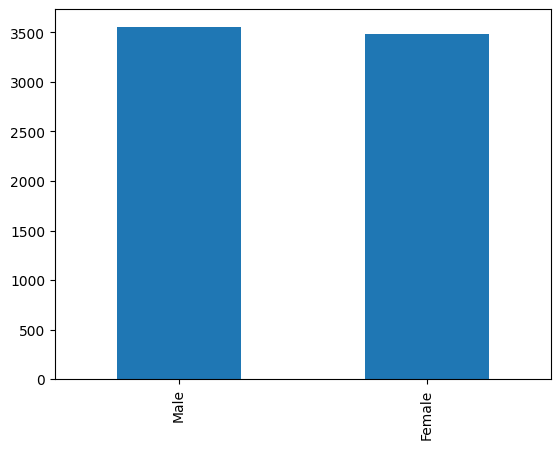

In [133]:
df['Gender'].value_counts().plot(kind='bar')

In [134]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1, inplace=True)

In [135]:
df['Total Charges'].replace(' ', np.nan, inplace=True)

In [136]:
df = df.drop_duplicates()

In [137]:
df = pd.get_dummies(df, columns=['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'])

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Tenure Months                             7021 non-null   int64  
 1   Monthly Charges                           7021 non-null   float64
 2   Total Charges                             7010 non-null   float64
 3   Churn Value                               7021 non-null   int64  
 4   Gender_Female                             7021 non-null   uint8  
 5   Gender_Male                               7021 non-null   uint8  
 6   Senior Citizen_No                         7021 non-null   uint8  
 7   Senior Citizen_Yes                        7021 non-null   uint8  
 8   Partner_No                                7021 non-null   uint8  
 9   Partner_Yes                               7021 non-null   uint8  
 10  Dependents_No                       

In [139]:
df.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,2,70.70,151.65,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,8,99.65,820.50,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,28,104.80,3046.05,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,49,103.70,5036.30,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0


In [140]:
X = df.loc[:, df.columns != 'Churn Value']
y = df.loc[:, df.columns == 'Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [141]:
numeric_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges']

scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
# X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [142]:
train_df = pd.concat([X_train, y_train], axis=1, join='inner')
# val_df = pd.concat([X_val, y_val], axis=1, join='inner')
test_df = pd.concat([X_test, y_test], axis=1, join='inner')

In [143]:
train_df.dropna(inplace=True)
# val_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [144]:
train_df.to_csv('train_data.csv')
# val_df.to_csv('val_data.csv')
test_df.to_csv('test_data.csv')